# House Prices Pedictions:

# Introduction

This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers.
A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. 

We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.
We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from.

1. Load Data and Packages

2. Data Preprocessing and cleaning

3. Impute Missing Data and Clean Data

4. EDA(Exploratory Data Analysis)

5. Analyzing the Test Variable (Sale Price)

6. Modeling and Predictions

## Objective

The aim of this work is to come up with the best house prices with the help of other explainatory variables. A thorough analysis has been done on the multiple variables along with the data distributions which has been provided. A lot of statistical measures have been taken in order to come up with the best desired outputs in the end. The problem has been solved using advanced regression algorithms as mentioned in the problem statement

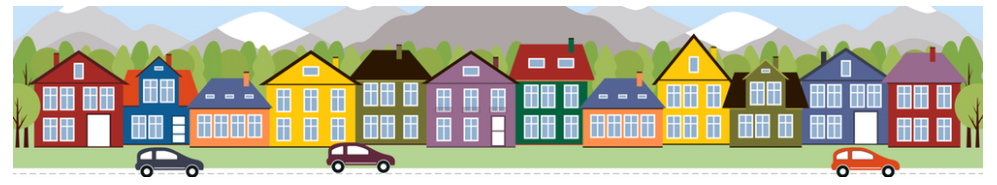

# Data set summary

The data provided has 1460 unique data-points along with 81 features. Among the 81 distinct features in the data, there are 35 "integer" type columns, 43 columns of type "object" and 3 of "float" type. The target variable as per the objective is the "SalePrice" column.



## Data fields
Here's a brief version of what you'll find in the data description file.

▬ SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

▬ MSSubClass: The building class

▬ MSZoning: The general zoning classification

▬ LotFrontage: Linear feet of street connected to property

▬ LotArea: Lot size in square feet

▬ Street: Type of road access

▬ Alley: Type of alley access

▬ LotShape: General shape of property

▬ LandContour: Flatness of the property

▬ Utilities: Type of utilities available

▬ LotConfig: Lot configuration

▬ LandSlope: Slope of property

▬ Neighborhood: Physical locations within Ames city limits

▬ Condition1: Proximity to main road or railroad

▬ Condition2: Proximity to main road or railroad (if a second is present)

▬ BldgType: Type of dwelling

▬ HouseStyle: Style of dwelling

▬ OverallQual: Overall material and finish quality

▬ OverallCond: Overall condition rating

▬ YearBuilt: Original construction date

▬ YearRemodAdd: Remodel date

▬ RoofStyle: Type of roof

▬ RoofMatl: Roof material

▬ Exterior1st: Exterior covering on house

▬ Exterior2nd: Exterior covering on house (if more than one material)

▬ MasVnrType: Masonry veneer type

▬ MasVnrArea: Masonry veneer area in square feet

▬ ExterQual: Exterior material quality

▬ ExterCond: Present condition of the material on the exterior

▬ Foundation: Type of foundation

▬ BsmtQual: Height of the basement

▬ BsmtCond: General condition of the basement

▬ BsmtExposure: Walkout or garden level basement walls

▬ BsmtFinType1: Quality of basement finished area

▬ BsmtFinSF1: Type 1 finished square feet

▬ BsmtFinType2: Quality of second finished area (if present)

▬ BsmtFinSF2: Type 2 finished square feet

▬ BsmtUnfSF: Unfinished square feet of basement area

▬ TotalBsmtSF: Total square feet of basement area

▬ Heating: Type of heating

▬ HeatingQC: Heating quality and condition

▬ CentralAir: Central air conditioning

▬ Electrical: Electrical system

▬ 1stFlrSF: First Floor square feet

▬ 2ndFlrSF: Second floor square feet

▬ LowQualFinSF: Low quality finished square feet (all floors)

▬ GrLivArea: Above grade (ground) living area square feet

▬ BsmtFullBath: Basement full bathrooms

▬ BsmtHalfBath: Basement half bathrooms

▬ FullBath: Full bathrooms above grade

▬ HalfBath: Half baths above grade

▬ Bedroom: Number of bedrooms above basement level

▬ Kitchen: Number of kitchens

▬ KitchenQual: Kitchen quality

▬ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

▬ Functional: Home functionality rating

▬ Fireplaces: Number of fireplaces

▬ FireplaceQu: Fireplace quality

▬ GarageType: Garage location

▬ GarageYrBlt: Year garage was built

▬ GarageFinish: Interior finish of the garage

▬ GarageCars: Size of garage in car capacity

▬ GarageArea: Size of garage in square feet

▬ GarageQual: Garage quality

▬ GarageCond: Garage condition

▬ PavedDrive: Paved driveway

▬ WoodDeckSF: Wood deck area in square feet

▬ OpenPorchSF: Open porch area in square feet

▬ EnclosedPorch: Enclosed porch area in square feet

▬ 3SsnPorch: Three season porch area in square feet

▬ ScreenPorch: Screen porch area in square feet

▬ PoolArea: Pool area in square feet

▬ PoolQC: Pool quality

▬ Fence: Fence quality

▬ MiscFeature: Miscellaneous feature not covered in other categories

▬ MiscVal: $Value of miscellaneous feature

▬ MoSold: Month Sold

▬ YrSold: Year Sold

▬ SaleType: Type of sale

▬ SaleCondition: Condition of sale

# Import Libraries

In [1]:
# Import the Libraries

# used for handling numbers
import numpy as np 

import pandas as pd   # used for handling the dataset

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
#show first 10 rows

dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# Show how many row and columns present
dataset.shape

(1460, 81)

In [5]:
dataset.index

RangeIndex(start=0, stop=1460, step=1)

In [6]:
#it show check the data set information using the info() command. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Show stats way in dataset min,max,count,percentile
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Preprocessing:

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.

### Check the missing values

In [8]:
#Let's check if the data set has any missing values. 
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

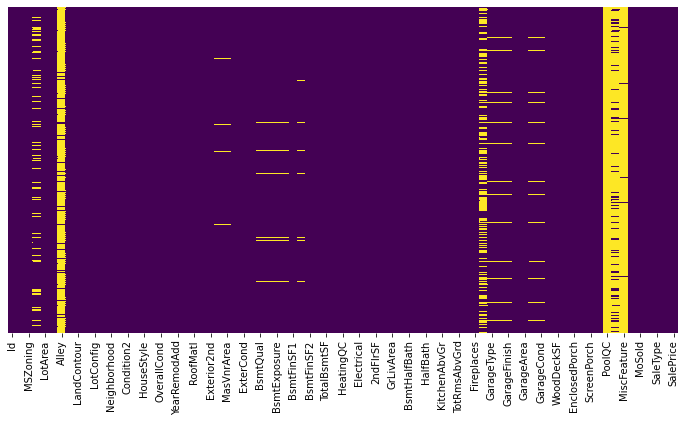

In [9]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Most of the colums have NA values but some columns in the data have NA values more than 50%. "Alley" has 94% of NA vales, "PoolLQC" has about 100% of NA values followed by "MiscFeature" with 96% and so on. All these columns are not at all useful for analysis as we won't be able to gain enough information from them.


In [10]:
#missing value counts in each of these columns

Isnull = dataset.isnull().sum()/len(dataset)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Visualising missing values:

In [11]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [12]:
Isnull.columns = ['count']

In [13]:
Isnull.index.names = ['Name']

In [14]:
Isnull['Name'] = Isnull.index

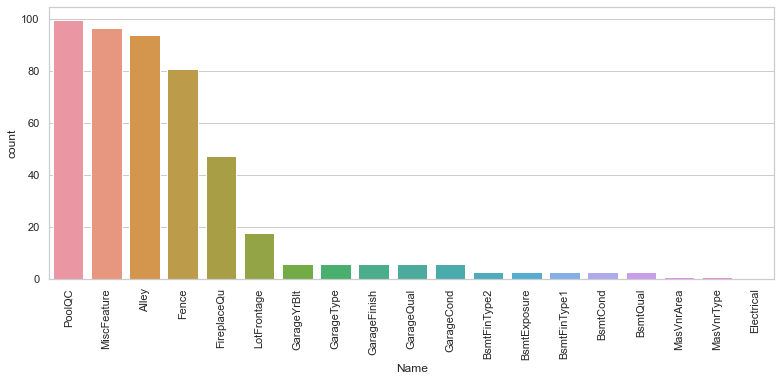

In [15]:
#plot Missing values

plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

### Imputting the missing values:

In [16]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
dataset['PoolQC'] = dataset['PoolQC'].fillna('None')

In [17]:
#Arround 50% missing values attributes have been fill by None
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('None')
dataset['Alley'] = dataset['Alley'].fillna('None')
dataset['Fence'] = dataset['Fence'].fillna('None')
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('None')

In [18]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
dataset['LotFrontage'] = dataset.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [19]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    dataset[col] = dataset[col].fillna('None')

In [20]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    dataset[col] = dataset[col].fillna(int(0))

In [21]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None

for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    dataset[col] = dataset[col].fillna('None')

In [22]:
#MasVnrArea : replace with zero

dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(int(0))

In [23]:
#MasVnrType : replace with None
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')

In [24]:
#There is put mode value 
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical']).mode()[0]

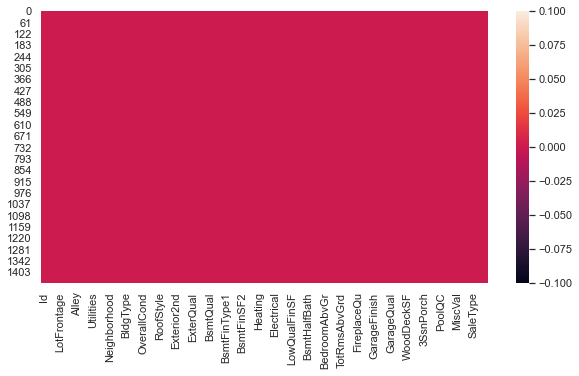

In [25]:
#Checking there is any null value or not

plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull())

# Now, there is no any missing values


# Exploratory Data Analysis(EDA):

### Correlations between the attributes:

In [26]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
dataset_corr = dataset.select_dtypes(include=[np.number])

In [27]:
dataset_corr.shape

(1460, 38)

In [28]:
#Delete Id because that is not need for correlation plot

del dataset_corr['Id']

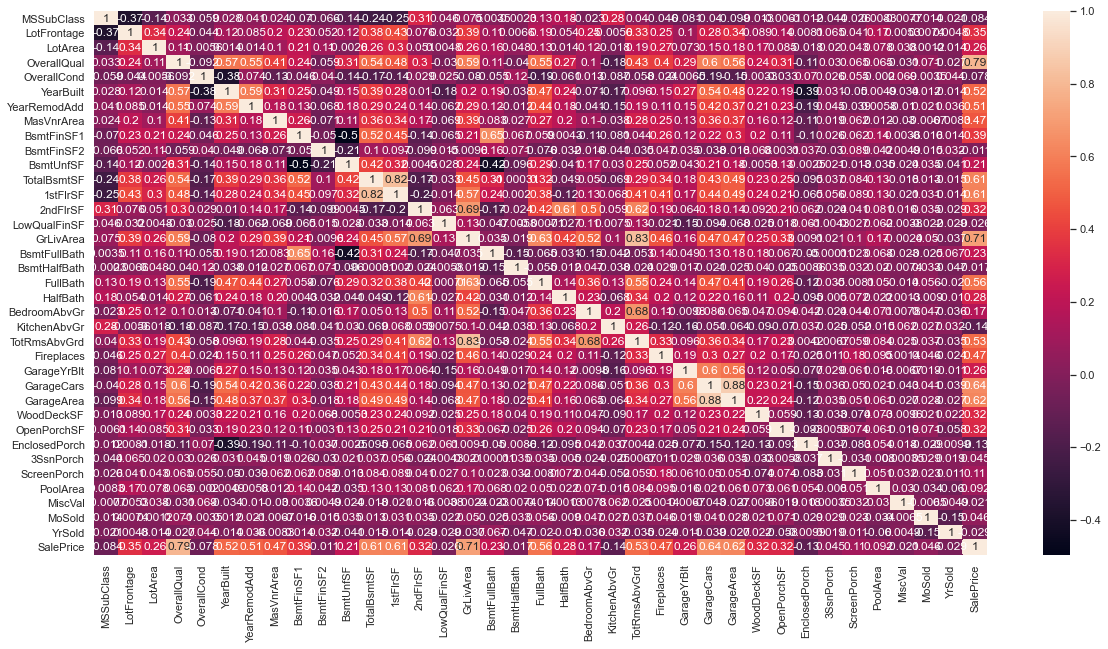

In [29]:
#Coralation plot
corr = dataset_corr.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

#### Top 60% Corralation  train attributes  with sale-price 

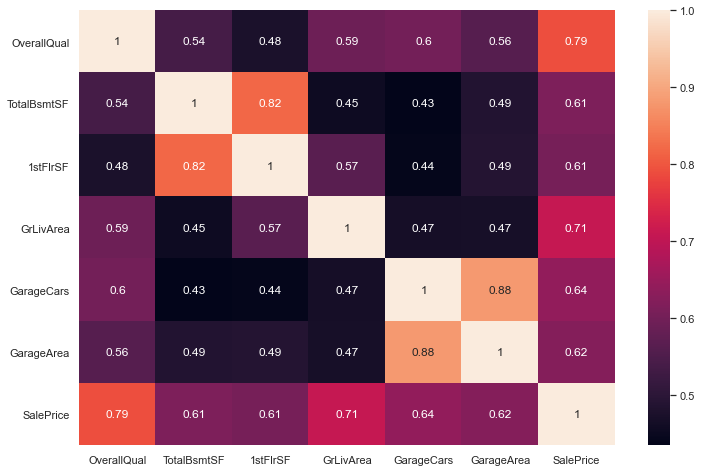

In [30]:
top_feature = corr.index[abs(corr['SalePrice']>0.6)]
plt.subplots(figsize=(12, 8))
top_corr = dataset[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [31]:
print("Find most important features relative to target")
corr = dataset.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

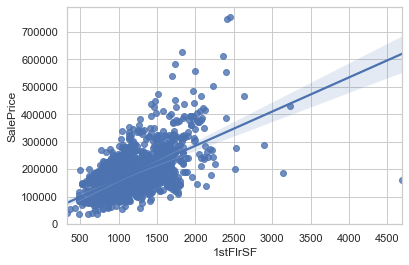

In [32]:
sns.regplot(x='1stFlrSF', y='SalePrice', data=dataset)

In [33]:
dataset[['1stFlrSF', 'SalePrice']].corr()

,1stFlrSF,SalePrice
1stFlrSF,1.000000,0.605852
SalePrice,0.605852,1.000000


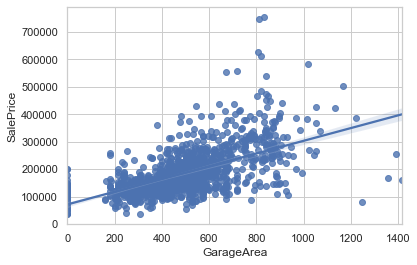

In [34]:
sns.regplot(x='GarageArea', y='SalePrice', data=dataset)

In [35]:
dataset[['GarageArea','SalePrice']].corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


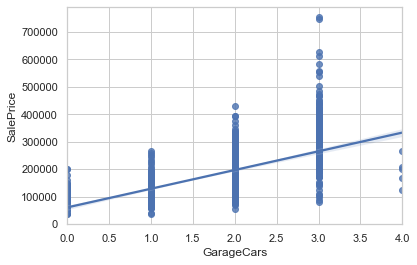

In [36]:
sns.regplot(x='GarageCars', y='SalePrice', data=dataset)


In [37]:
dataset[['GarageCars', 'SalePrice']].corr()

,GarageCars,SalePrice
GarageCars,1.000000,0.640409
SalePrice,0.640409,1.000000


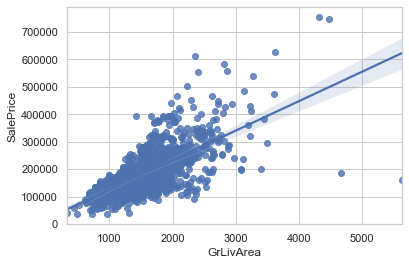

In [38]:
sns.regplot(x='GrLivArea', y='SalePrice', data=dataset)

In [39]:
dataset[['GrLivArea', 'SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


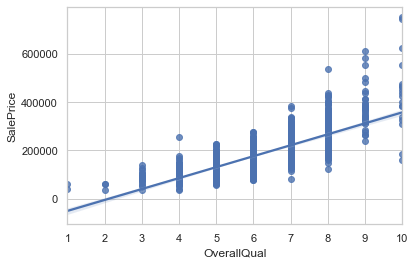

In [40]:
sns.regplot(x='OverallQual', y='SalePrice', data=dataset)

In [41]:
dataset[['OverallQual', 'SalePrice']].corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


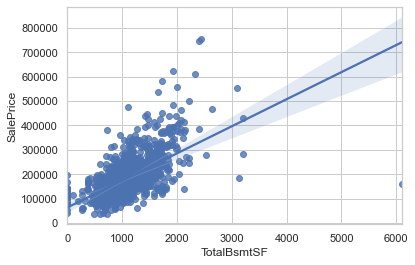

In [42]:
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=dataset)

In [43]:
dataset[['TotalBsmtSF', 'SalePrice']].corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


In [44]:
numeric_cols = [i for i in dataset.columns if dataset[i].dtype == "int64" or dataset[i].dtype == "float64"]
numeric_cols.remove("Id")
category_cols = [i for i in dataset.columns if dataset[i].dtype == "object"]
dataset[category_cols] = dataset[category_cols].fillna("None")

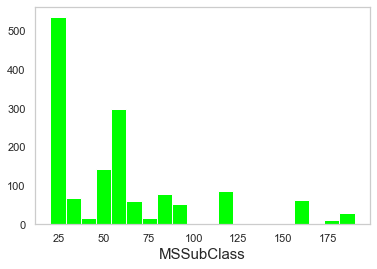

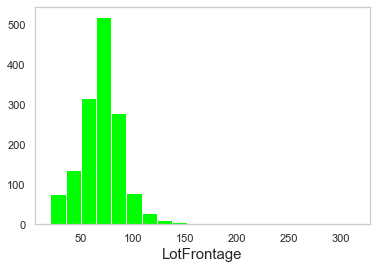

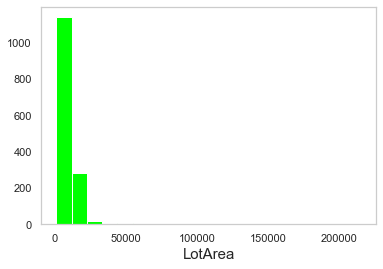

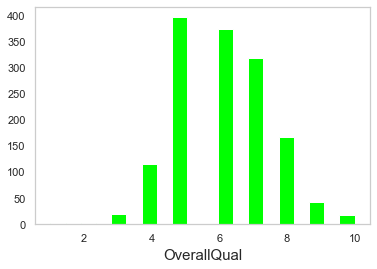

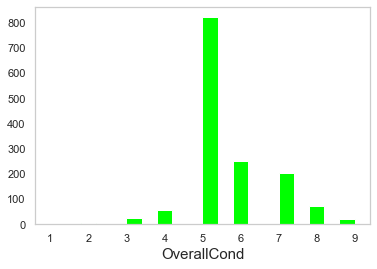

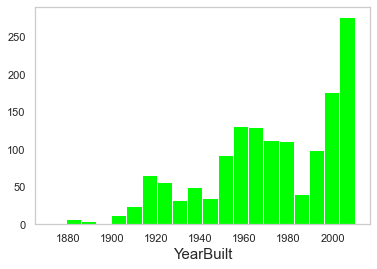

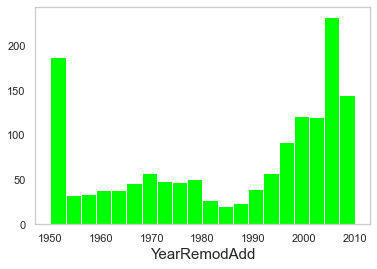

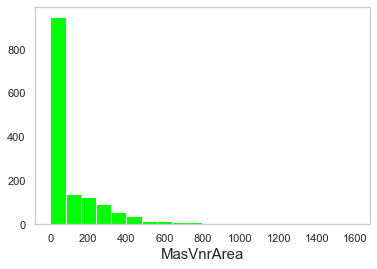

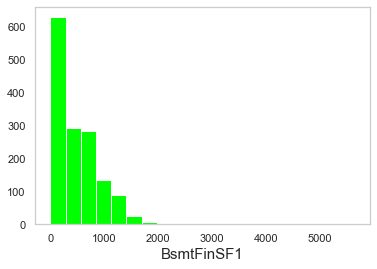

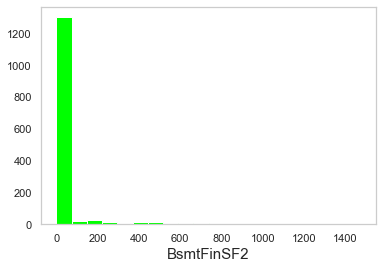

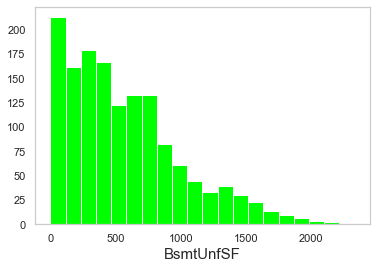

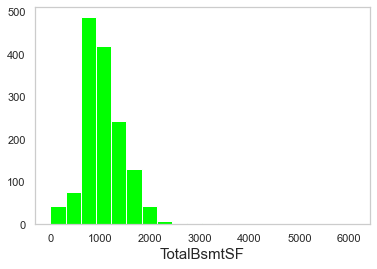

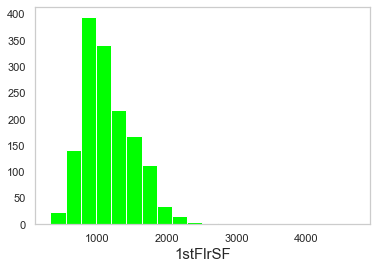

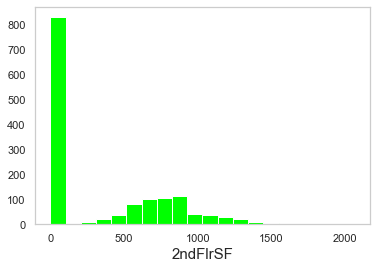

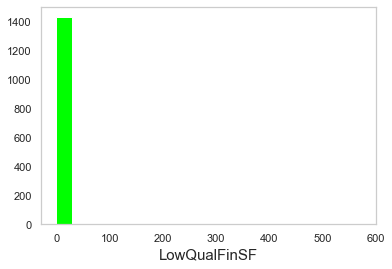

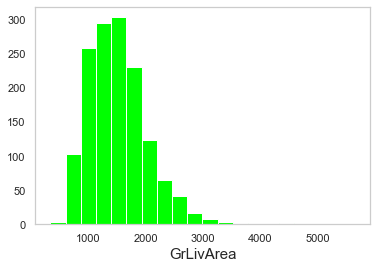

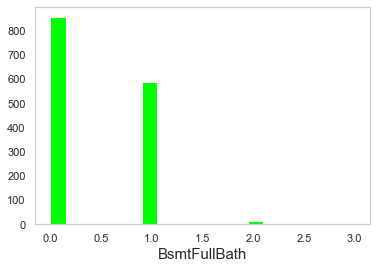

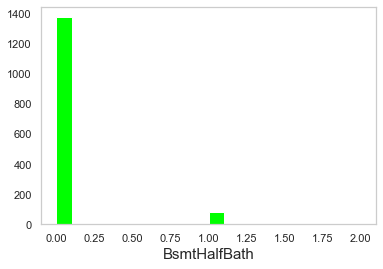

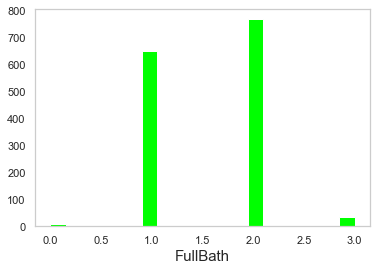

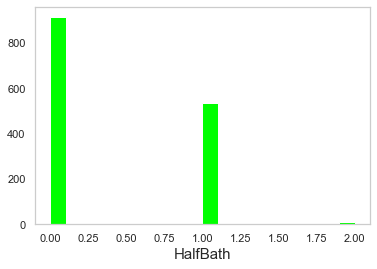

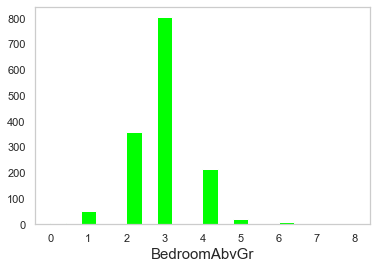

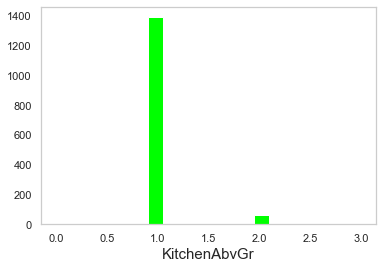

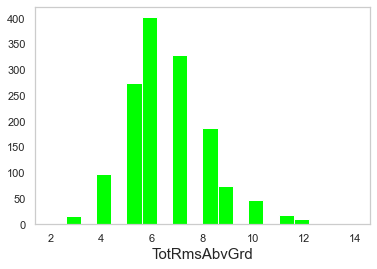

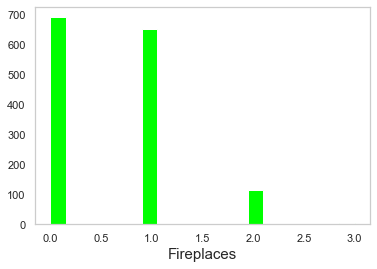

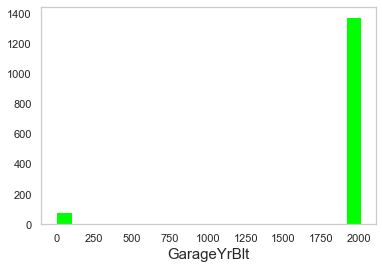

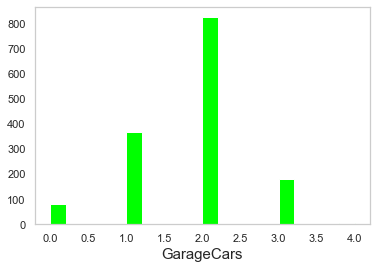

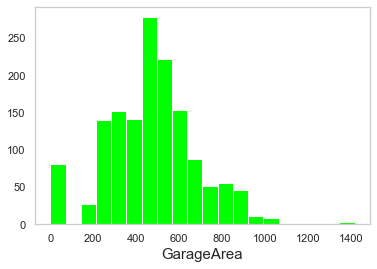

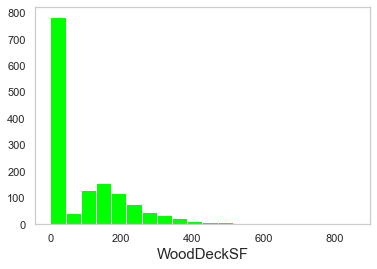

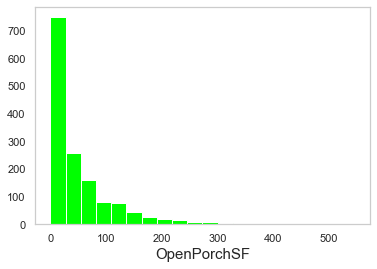

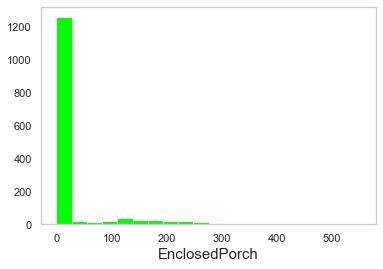

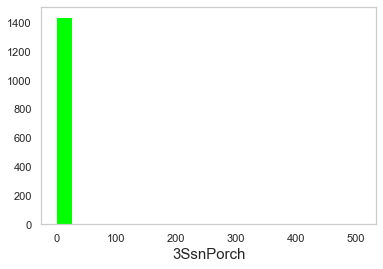

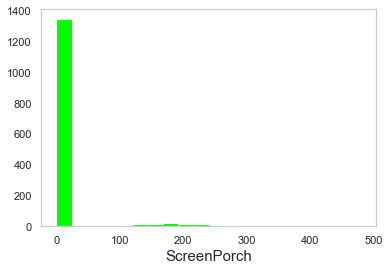

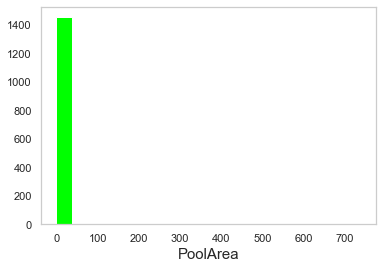

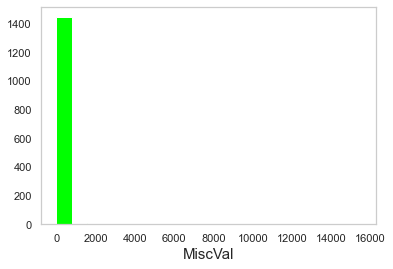

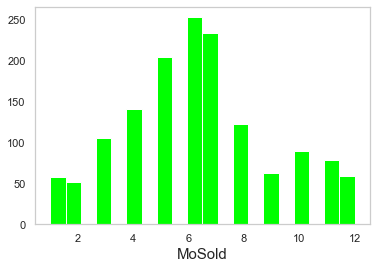

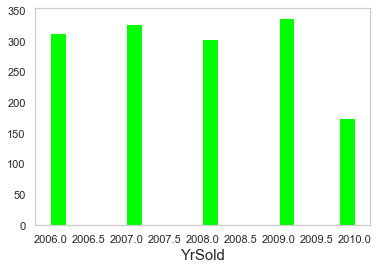

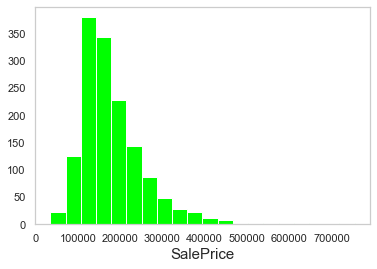

In [45]:
def hist_for_nums(num_cols):
    for col in num_cols:
        dataset[col].hist(bins=20, color="lime", grid = False)
        plt.xlabel(col, size = 15)
        plt.show()
hist_for_nums(numeric_cols)

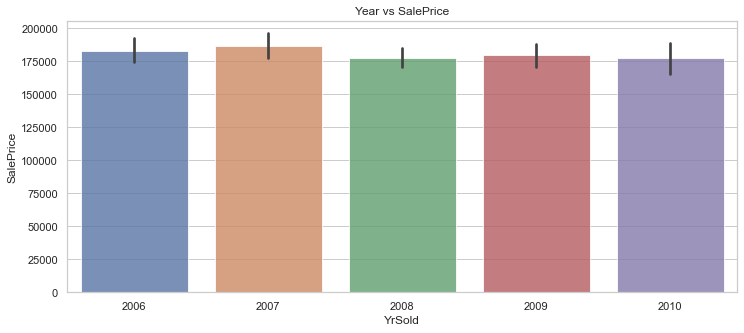

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(x=dataset['YrSold'],y=dataset['SalePrice'],data = dataset,alpha=0.8)
plt.title('Year vs SalePrice');

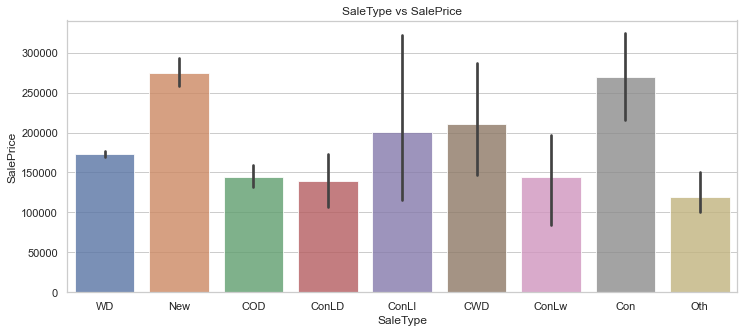

In [47]:
plt.figure(figsize=(12,5))
sns.barplot(x=dataset['SaleType'],y=dataset['SalePrice'],data = dataset,alpha=0.8)
plt.title('SaleType vs SalePrice');

# SOME ANALYSIS ON TARGET VARIABLES:

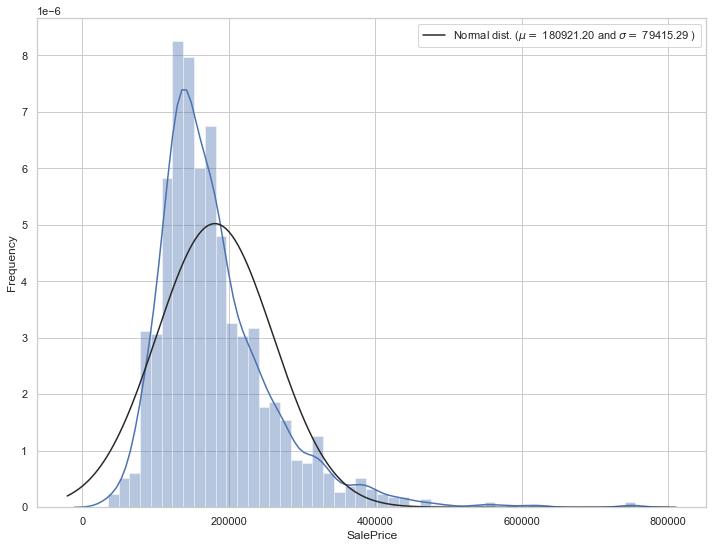

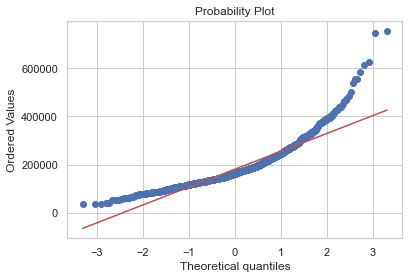

In [48]:
from scipy import stats
plt.subplots(figsize=(12,9))
sns.distplot(dataset['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(dataset['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(dataset['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

Here we use log for target variable to make more normal distribution

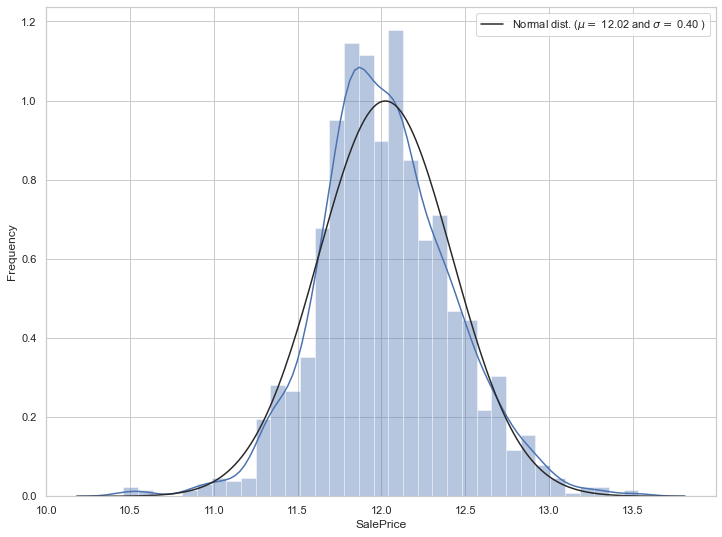

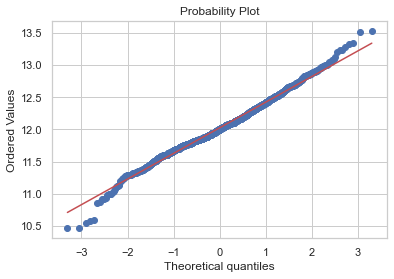

In [49]:
#we use log function which is in numpy
dataset['SalePrice'] = np.log1p(dataset['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(dataset['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(dataset['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(dataset['SalePrice'], plot=plt)
plt.show()

# Pearson Correlation Coefficient:

Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

### Lets calculate the P-value. It is the probability value between two variables is statistically significant. For example:
- if we choose significance level of 0.05, that means that we are 95% confident that the correlation between the variables is significant.

By convention, when the:

p-value is < 0.001: we say there is strong evidence that the correlation is significant.

the p-value is < 0.05: there is moderate evidence that the correlation is significant.

the p-value is < 0.1: there is weak evidence that the correlation is significant.

the p-value is > 0.1: there is no evidence that the correlation is significant.

- ### Lets calculate the Pearson Correlation Coefficient and P-value of OverallQual and SalePrice:

In [50]:
pearson_coef, p_value=stats.pearsonr(dataset['OverallQual'], dataset['SalePrice'])
print('The Pearson Correlation Coefficient is ', pearson_coef, 'with a P-value of P =', p_value)

The Pearson Correlation Coefficient is  0.8171846144867663 with a P-value of P = 0.0


#### Conclusion:

- Since the p-value is < 0.001, the correlation between OverallQual and SalePrice is statistically _SIGNIFICANT_, and the coefficient of ~ 0.81 shows that the relationship is _QUITE STRONG_.

- ### Lets calculate the Pearson Correlation Coefficient and P-value of GrLivAea and SalePrice:

In [51]:
pearson_coef, p_value=stats.pearsonr(dataset['GrLivArea'], dataset['SalePrice'])
print('The Pearson Correlation Coefficient is ', pearson_coef, 'with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.7009269871427148 with a P-value of P= 3.0581511102488876e-216


#### Conclusion:

- Since the p-value is < 0.001, the correlation between GrLivArea and SalePrice is statistically _SIGNIFICANT_, and the coefficient of ~ 0.70 shows that the relationship is _MODERATELY STRONG_.

- ### Lets calculate the Pearson Correlation Coefficient and P-value of GarageCars and SalePrice:

In [52]:
pearson_coef, p_value=stats.pearsonr(dataset['GarageArea'], dataset['SalePrice'])
print('The Pearson Correlation Coefficient is ', pearson_coef, 'with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.6508876811435944 with a P-value of P= 1.1060270514523493e-176


#### Conclusion:

- Since the p-value is < 0.001, the correlation between GarageArea and SalePrice is statistically _SIGNIFICANT_, and the coefficient of ~ 0.65 shows that the relationship is _MODERATELY STRONG_.

- ### Lets calculate the Pearson Correlation Coefficient and P-value of TotalBsmtSF and SalePrice:

In [53]:
pearson_coef, p_value=stats.pearsonr(dataset['TotalBsmtSF'], dataset['SalePrice'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is 0.6121342283262257  with a P-value of P= 7.531828096458291e-151


#### Conclusion:

- Since the p-value is < 0.001, the correlation between TotalBsmtSF and SalePrice is statistically _SIGNIFICANT_, and the coefficient of ~ 0.61 shows that the relationship is _MODERATE_.

- ### Lets calculate the Pearson Correlation Coefficient and P-value of 1StFlrSF and SalePrice:

In [54]:
pearson_coef, p_value=stats.pearsonr(dataset['1stFlrSF'], dataset['SalePrice'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P=', p_value)

The Pearson Correlation Coefficient is 0.5969813231855339 with a P-value of P= 1.0742929799907151e-141


#### Conclusion:

- Since the p-value is < 0.001, the correlation between 1stFLrSF and SalePrice is statistically _SIGNIFICANT_, and the coefficient of ~ 0.59 shows that the relationship is _MODERATE_.

 - ### I  summary, we came to a conclusion what our data looks like and which variables are important to take into account when predicting the house price. We have narrowed it down to the following 6 variables:
 - OverallQual
 - GrLivArea
 - GarageCars
 - GarageArea
 - TotalBsmtSF
 - 1stFlrSF


Out of all of them, variable  _'OverallQual'_ has the Strongest positive and Significant relationship to our target - 'SalePrice'.

- ### As we will be moving into building our machine learning models to automate our analysis, feeding the model with variables we selected in conclusion, which meaningfully affect our target variable will improve our model's prediction performance.

# Convert Categoricals to numeric

It covert the categorical data to numeric data .In House pricing dataset present more columns of categorical data it do not give better result So We apply Label Encoder to convert in to numerical form.

In [55]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [56]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset[c].values)) 
    dataset[c] = lbl.transform(list(dataset[c].values))

# Machine Learning Models:-

# 1.Simple linear Regression:-

Linear regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable. The factors that are used to predict the value of the dependent variable are called the independent variables.

In linear regression, each observation consists of two values. One value is for the dependent variable and one value is for the independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.

In [57]:
X = pd.DataFrame(dataset.iloc[:,17])
y = pd.DataFrame(dataset.iloc[:,80])

# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [58]:
#Fitting Simple linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression()

In [59]:
print('Coefficients\n',regressor.coef_)

print('Intercept\n',regressor.intercept_)

#Predicting the Test set results
y_pred=regressor.predict(X_test)

#The Mean Squared error
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
#Best possible score is 1.0 and it can be negative

print("R2 score: {}".format(r2_score(y_test,y_pred)))

a=" {}".format(r2_score(y_test,y_pred))

p= " {}".format(mean_squared_error(y_test,y_pred))

Coefficients
 [[0.23643033]]
Intercept
 [10.58392111]
Mean squared error: 0.04753446057702799
R2 score: 0.7150017206209918


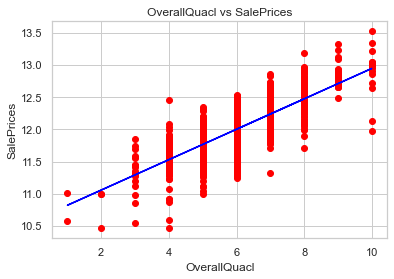

In [60]:
#Visualizing a train set result:-
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')

plt.title('OverallQuacl vs SalePrices')
plt.xlabel('OverallQuacl')
plt.ylabel('SalePrices')
plt.show()


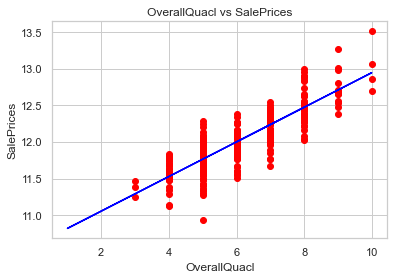

In [61]:
#Visualizing a test set:-

plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')

plt.title('OverallQuacl vs SalePrices')
plt.xlabel('OverallQuacl')
plt.ylabel('SalePrices')
plt.show()

# Multiple Linear Regression:

Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.

In [62]:
X = pd.DataFrame(dataset.iloc[:,[17,38,43,61,62,63]])

y = pd.DataFrame(dataset.iloc[:,80])


In [63]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [64]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

b=" {}".format(r2_score(y_test,y_pred))
q= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.7150017206209918
Mean squared error:0.04753446057702799
absolute error 0.16904596854709056
mean absolute error 0.2180239908290553


# Decision Tree Regression:-

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

In [65]:
X = pd.DataFrame(dataset.iloc[:,17])
y = pd.DataFrame(dataset.iloc[:,80])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [67]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [68]:
y_pred=tree_reg.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

c=" {}".format(r2_score(y_test,y_pred))
r= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.6795894762781185
Mean squared error:0.046293251390624145
absolute error 0.16288808121621204
mean absolute error 0.2151586656182459


# Random Forest Regression:-

A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

<ipython-input-71-35a2da063e8d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [72]:
y_pred=forest_reg.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

d=" {}".format(r2_score(y_test,y_pred))
t= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.7063660162959449
Mean squared error:0.05052411988105856
absolute error 0.17254198851076663
mean absolute error 0.2247757101669541


# Gradient Boosting Regression:

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [74]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [75]:
#Fit
GBR.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=4)

In [76]:
e=("Accuracy --> ", GBR.score(X_test, y_test)*100)

In [77]:
print(e)

('Accuracy --> ', 70.75010044984391)


# Support Vector Machine:

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

In [99]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
dataset_train_predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(X_train, y_train)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(X_train, y_train)

f=('{:25s}{:5.3f}'.format('Root Mean Squared Error:', svm_rmse))
n=('{:25s}{:5.3f}'.format('Mean Absolute Error:', svm_mae))

scores = cross_val_score(svm_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)

print(f)
print(n)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

Root Mean Squared Error: 6.026
Mean Absolute Error:     5.927


The default SVM model performs worse than all four models above. Either other settings (ex: kernel) can be tested, or more powerful models are needed.

# Resultant tabel for R2 Score:

In [100]:
print("R2 score for the following regressions are")
print("simple linear regression:",a)
print("multiple linear regression:",b)
print("decision tree regression:",c)
print("random forest regressor:",d)
print("gradientboosting regression:",e)
print("svm regression:",f)

R2 score for the following regressions are
simple linear regression:  0.7150017206209918
multiple linear regression:  0.7150017206209918
decision tree regression:  0.6795894762781185
random forest regressor:  0.7063660162959449
gradientboosting regression: ('Accuracy --> ', 70.75010044984391)
svm regression: Root Mean Squared Error: 6.026


# ASSOCIATION RULE MINING:-

Association rule mining is a procedure which aims to observe frequently occurring patterns, correlations, or associations from datasets found in various kinds of databases such as relational databases, transactional databases, and other forms of repositories. Association Rule Mining is one of the ways to find patterns in data. It finds:

• features (dimensions) which occur together

• features (dimensions) which are “correlated”

The main aim is to find the house prediction and patterns of the clients interest from a different Housestyle,their Sale type,Sale Condition Basically interests of clients who buy house.

In [81]:
dataset=pd.read_csv('train.csv')

In [82]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [83]:
df=dataset.drop(['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','LotConfig',
              'LandSlope','Condition1','Condition2','BldgType','OverallCond','YearBuilt',
              'YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond',
              'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
              'BsmtUnfSF','BsmtUnfSF','Heating','HeatingQC','CentralAir','Electrical','2ndFlrSF',
              'LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','BedroomAbvGr',
              'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt',
              'GarageFinish','GarageQual','GarageCond','PavedDrive','WoodDeckSF', 
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature',
              'MiscVal','MoSold','YrSold','OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea',
                'GarageCars','GarageArea','SalePrice','Utilities'],axis = 1)

In [84]:
df

,Neighborhood,HouseStyle,SaleType,SaleCondition
0,CollgCr,2Story,WD,Normal
1,Veenker,1Story,WD,Normal
2,CollgCr,2Story,WD,Normal
3,Crawfor,2Story,WD,Abnorml
4,NoRidge,2Story,WD,Normal
...,...,...,...,...
1455,Gilbert,2Story,WD,Normal
1456,NWAmes,1Story,WD,Normal
1457,Crawfor,2Story,WD,Normal
1458,NAmes,1Story,WD,Normal


# Apriori

Apriori algorithm, a classic algorithm, is useful in mining frequent itemsets and relevant association rules. Usually, we operate this algorithm on a database containing a large number of transactions. 

In [85]:
transactions=[]

for i in range(0,4):
    transactions.append([str(df.values[i,j])for j in range(0,4)])

In [86]:
#Build the Apriori model
from apyori import apriori
association_rule=apriori(transactions,min_support = 0.025, min_confidence = 0.5,min_lift = 3 ,min_length = 2)
result=list(association_rule)

In [87]:
# Print out the number of rules
print(len(result))

8


In [88]:
#Have a glance at the rule
print(result)

[RelationRecord(items=frozenset({'1Story', 'Veenker'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1Story'}), items_add=frozenset({'Veenker'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'Veenker'}), items_add=frozenset({'1Story'}), confidence=1.0, lift=4.0)]), RelationRecord(items=frozenset({'Crawfor', 'Abnorml'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Abnorml'}), items_add=frozenset({'Crawfor'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'Crawfor'}), items_add=frozenset({'Abnorml'}), confidence=1.0, lift=4.0)]), RelationRecord(items=frozenset({'1Story', 'Veenker', 'Normal'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1Story'}), items_add=frozenset({'Veenker', 'Normal'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'Veenker'}), items_add=frozenset({'1Story', 'Normal'}), confidence=1.0, lift=4.0), OrderedStatistic(items_

## lift=observed support/expected support     ,when x and y are independent

In [89]:
lift = []
association = []

for i in range (0, len(result)):
    lift.append(result[:len(result)][i][2][0][3])
    association.append(list(result[:len(result)][i][0]))

# Visualizing results in a dataframe:

In [90]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [91]:
# Show higher lift scores
rank.sort_values('Lift',ascending=False).head(10)

,Association,Lift
0,"[1Story, Veenker]",4
1,"[Crawfor, Abnorml]",4
2,"[1Story, Veenker, Normal]",4
3,"[1Story, Veenker, WD]",4
4,"[Crawfor, Abnorml, 2Story]",4
5,"[Crawfor, Abnorml, WD]",4
6,"[1Story, Veenker, WD, Normal]",4
7,"[Crawfor, Abnorml, WD, 2Story]",4


# RESULTING RULES:

Total 8 Associate rules were generated from the dataset:

Rule 1) Maximum 1Story HouseStyle are from Veenker Neighbourhood.

Rule 2) Most of the Crawfor Neighbourhood are from Abnormal SaleCondition.

Rule 3) The Sale Condition is Normal of Veenker Neighbourhood is most preferable.

Rule 4) Most of the Sale Type is WD of Veenker Neighbourhood is most preferable.

Rule 5) Most of the Crawfor Neighbourhood are from 2Story Housestyle.

Rule 6)  Most of the Crawfor Neighbourhood are from WD SaleType.

Rule 7) Most of the 1Story Houstyle prefer WD SaleType of normal Salecondition .

Rule 8) Most of 2Story Housestyle prefer Abnormal Salecondition.


# Thank you!!